# Реализация Задания 3.1a

Импортируем нужные модули 

In [135]:
import numpy as np
import matplotlib.pyplot as plt

Импортируем функцию `FuncAnimation` из модуля animation пакета `matplotlib`

In [136]:
from matplotlib.animation import FuncAnimation

Вызовем специальную команду JupyterLab, необходимую для корректного отображения анимации в интерактивном документе

In [137]:
%matplotlib widget

Определим функцию с применением оператора `def`

In [138]:
def y(x):
 return np.sin(x)**4

Создадим переменные


In [139]:
x_min = 1.; x_max = 5.; step = 0.05

Cоздадим массив `x_array` равномерно распределенных чисел на отрезке *{х_min, x_max]* с шагом *step* с помощью функции `arange` . Создадим массив
`y_array` соответствующих значений *y* с помощью пользовательской функции `y`

In [140]:
x_array = np.arange(x_min, x_max, step)
y_array = y(x_array)

Из двух массивов `x_array` и `y_arra`y создадим матрицу `matrix` координат точек графика функци *y(x)*

In [141]:
matrix = np.transpose([x_array, y_array])

Cоздадим графическое окно `fig1` , в котором в дальнейшем будет отображаться анимация


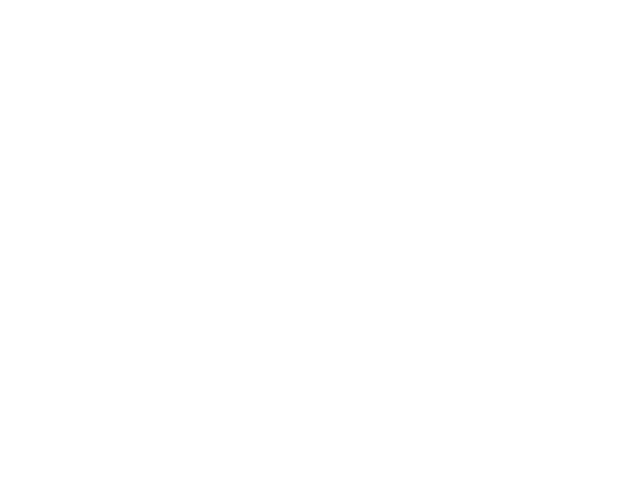

In [142]:
fig1 = plt.figure()

C помощью функции axes из модуля `pyplot` cоздадим графическую область `ax1` и зададим для нее пределы по осям

In [143]:
y_min, y_max = np.min(y_array), np.max(y_array)
ax1 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])

(np.float64(0.5),
 np.float64(5.5),
 np.float64(-0.499999995004082),
 np.float64(1.4996930655910048))

Cоздадим в графической области `ax1` графический объект типа `Line2D` синего цвета, координаты которого пока не определены

In [144]:
line1, = ax1.plot([],[],'b')
print(type(line1))
line1.get_xdata(), line1.get_ydata()

<class 'matplotlib.lines.Line2D'>


(array([], dtype=float64), array([], dtype=float64))

Определим пользовательскую функцию одного аргумента `at_frame1`, которая будет вызываться в каждом кадре анимации.


In [145]:
def at_frame1(point):

 x_coord = list(line1.get_xdata())
 y_coord = list(line1.get_ydata())

 x_coord.append(point[0])
 y_coord.append(point[1])

 line1.set_data(x_coord, y_coord)

In [146]:
help(at_frame1)

Help on function at_frame1 in module __main__:

at_frame1(point)



In [147]:
print(at_frame1.__doc__)

None


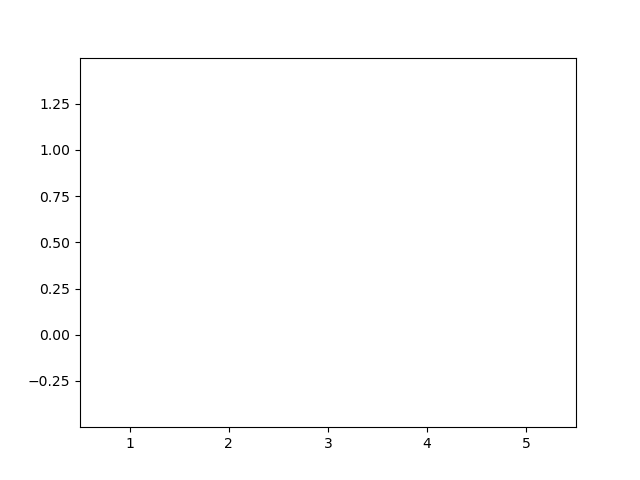

In [150]:
fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
line1, = ax1.plot([], [],'b')
FuncAnimation(fig1, at_frame1, frames=matrix, repeat=False, interval=15)

In [151]:
plt.close('all')

# Реализация Задания 3.2 для функции $y(x)=sin(x)^4$

- C помощью функции `figure` создадим графическое окно, в котором в дальнейшем будет отображаться анимация
- C помощью функции `axes` cоздадим графическую область и зададим для нее пределы по осям с помощью функции `axis`
- C помощью функции `plot` создадим в графической области графический объект типа `Line2D `синего цвета `'b'` , координаты которого описывают
аналитическую функцию
- C помощью функции plot создадим в графической области графический объект типа `Line2D` зеленого цвета с маркером в виде кружка `'go'` ,
координаты которого пока неизвестны

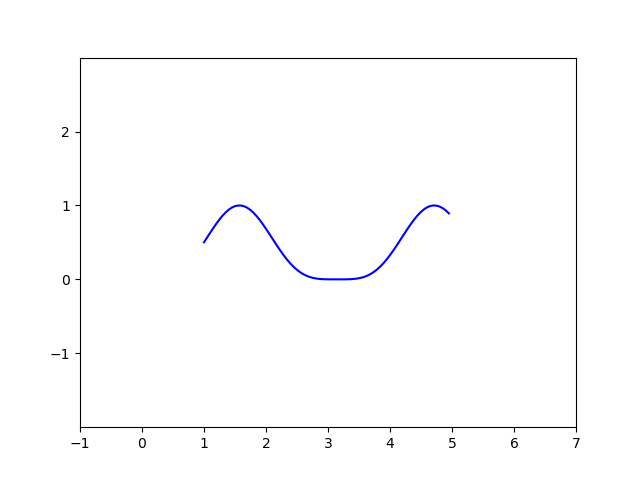

In [152]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min-2, x_max+2, y_min-2, y_max+2])
line1, = ax2.plot(x_array, y_array,'b') # объект для графика функции
line2, = ax2.plot([], [],'go') 

Определим пользовательскую функцию одного аргумента `at_frame2` , которая будет вызываться в каждом кадре анимации.

In [153]:
def at_frame2(point):
 line2.set_data([point[0]],[point[1]])

Полагаем аргумент `init_func` функции `FunAnimation` равным пользовательской функции `init` : `init_func=init` . Функция `init` будет вызываться перед
началом анимации. Назначение функции `init` : отображение графика функции,создание графика для отображения точки и создание легенды для двух графиков.


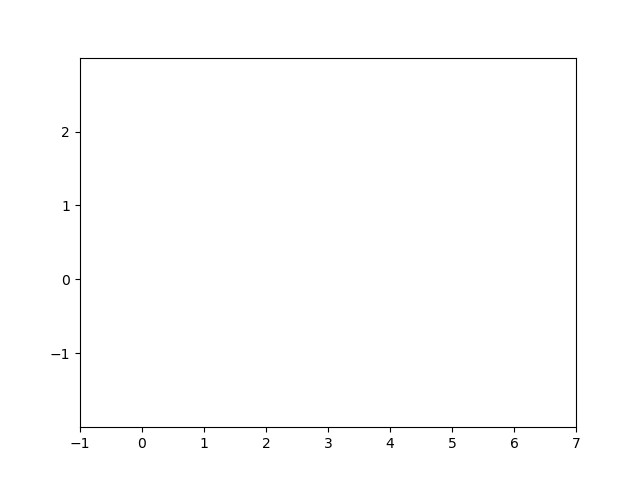

In [154]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min-2, x_max+2, y_min-2, y_max+2])
def init():


 global line2

 line1, = ax2.plot(x_array, y_array,'b')
 line2, = ax2.plot([], [],'go')
 plt.legend([r'$y(x) = \sin(x)^4$','Мovable point'])
FuncAnimation(fig2, at_frame2, frames=matrix, init_func=init,
 repeat=False, interval=20)

In [155]:
plt.close('all')


# Реализация Задания 3.3 для функции $y(x)=sin(x)^4$

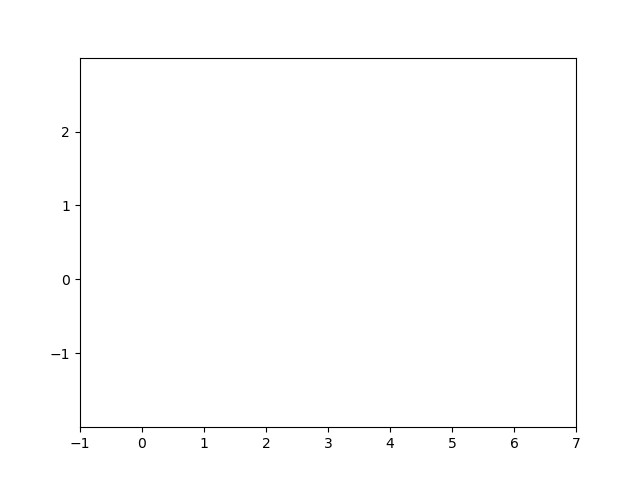

In [156]:
fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min-2, x_max+2, y_min-2, y_max+2])

def init():
    global point_B, secant_line
    curve, = ax3.plot(x_array, y_array, 'b')
    
    A = np.array([x_array[0], y_array[0]])
    point_A, = ax3.plot(A[0], A[1], 'ro')
    
    B = np.array([x_array[-1], y_array[-1]])
    point_B, = ax3.plot(B[0], B[1], 'go')
    
    secant_p = [A + (B - A)*t for t in [-2, 2]]
    secant_p = np.array(secant_p)
    secant_line, = ax3.plot(secant_p[:,0], secant_p[:,1], 'g')
    
    plt.legend([r'$y(x) = \sin(x)^4$', 'Unmovable point A', 'Movable point B', 'Secant line'])

def at_frame3(point):
    global point_B, secant_line
    
    point_B.set_data([point[0]], [point[1]])
    
    A = np.array([x_array[0], y_array[0]])
    B = np.array([point[0], point[1]])
    
    if np.allclose(A, B):
        k = 4 * np.sin(A[0])**3 * np.cos(A[0]) 
        
        tangent_x = np.array([A[0] - 1, A[0] + 1])
        tangent_y = k * (tangent_x - A[0]) + A[1]
        
        secant_line.set_data(tangent_x, tangent_y)
        secant_line.set_color('r')
    else:
 
        secant_p = [A + (B - A)*t for t in [-2, 2]]
        secant_p = np.array(secant_p)
        secant_line.set_data(secant_p[:,0], secant_p[:,1])
        secant_line.set_color('g')

FuncAnimation(fig3, at_frame3, frames=matrix[::-1],init_func=init, repeat=False, interval=20)

In [133]:
plt.close('all')